In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
D = 0.236 #[cm]

In [20]:
def get_stat(fstart, fend, xpos, vars, along='y'):
  ds = yt.load(fstart)
  time_of_avg = float(ds.current_time)
  ds = yt.load(fend)
  time_of_avg = float(ds.current_time) - time_of_avg 
  
  if along == 'y':
    lineout = ds.ortho_ray(1, (0, xpos)) # a cut along the y
    srt = np.argsort(lineout["index", "y"])
    r = np.array(lineout["index", "y"][srt])
  elif along == 'z':
    lineout = ds.ortho_ray(2, (xpos, 0)) # a cut along the z
    srt = np.argsort(lineout["index", "z"])
    r = np.array(lineout["index", "z"][srt])
  
  avg_out = []
  rms_out = []
  for var in vars:
    avg = np.array(lineout["boxlib", "time_avg_"+var][srt]) / time_of_avg
    if var in ["u", "v", "w"]:
      avg = avg / 100
      rms = 0.0 * avg # no rms data recorded for velocity
    else:
      var = np.array(lineout["boxlib", "mean_squared_"+var][srt]) / time_of_avg - avg**2
      rms = np.sqrt(var * (var > 0))

    avg_out.append(avg)
    rms_out.append(rms)

  # if len(vars) == 1:
  #   avg_out = avg_out[0]
  #   rms_out = rms_out[0]

  return r, avg_out, rms_out

In [3]:
def plot_one_simulation(fstart, fend, xpos, vars):  
  y, avg, rms = get_stat(fstart, fend, xpos*D, vars)

  for i in range(len(vars)):
    plt.subplot(len(vars), 2, 2*(i+1)-1)
    plt.plot(y/D, avg[i])
    
    plt.subplot(len(vars), 2, 2*(i+1))
    plt.plot(y/D, rms[i])
    
  # z, avgz, rmsz = get_stat(fstart, fend, xpos*D, vars, along='z')

  # for i in range(len(vars)):
  #   plt.subplot(len(vars), 2, 2*(i+1)-1)
  #   plt.plot(z/D, avgz[i])

  #   plt.subplot(len(vars), 2, 2*(i+1))
  #   plt.plot(z/D, rmsz[i])

def produce_figure(xpos):
  vars = ['T', 'X_O2', 'X_N2', 'X_H2O', 'X_H2', 'X_OH']

  plt.figure(figsize=(8,10))
  plt.suptitle("x/D = "+str(xpos),fontweight="bold")

  plot_one_simulation("~/plt03000", "~/plt06000", xpos, vars) # Coarse ILES
  plot_one_simulation("~/plt01900", "~/plt04600", xpos, vars) # Fine ILES

  for i in range(len(vars)):
    plt.subplot(len(vars), 2, 2*(i+1)-1)
    plt.ylabel(vars[i])
    if i == 0:
      plt.title("mean")
    if i == len(vars)-1:
      plt.xlabel("r/D")

    plt.subplot(len(vars), 2, 2*(i+1))
    plt.ylabel(vars[i])
    if i == 0:
      plt.title("rms")
    if i == len(vars)-1:
      plt.xlabel("r/D")

  # https://core.ac.uk/download/pdf/42814464.pdf
  ref = np.loadtxt("ref_data/x_over_D_"+str(xpos)+".csv", delimiter=',', skiprows=1)

  for i in range(len(vars)):
    plt.subplot(len(vars), 2, 2*(i+1)-1)
    plt.plot(ref[:,0], ref[:,2*(i+1)-1], 'k.')
    plt.xlim([ref[0,0]*1.2, ref[-1,0]*1.2])

    plt.subplot(len(vars), 2, 2*(i+1))
    plt.plot(ref[:,0], ref[:,2*(i+1)], 'k.')
    plt.xlim([ref[0,0]*1.2, ref[-1,0]*1.2])
    if i == len(vars)-1:
      plt.legend(["ILES", "Fine ILES", "Exp"])

  plt.tight_layout()

yt : [INFO     ] 2023-08-02 11:53:39,603 Parameters: current_time              = 0.000492294142197039
yt : [INFO     ] 2023-08-02 11:53:39,604 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO     ] 2023-08-02 11:53:39,605 Parameters: domain_left_edge          = [ 0.   -3.54 -3.54]
yt : [INFO     ] 2023-08-02 11:53:39,606 Parameters: domain_right_edge         = [17.7   3.54  3.54]


yt : [INFO     ] 2023-08-02 11:53:39,683 Parameters: current_time              = 0.000990646858266035
yt : [INFO     ] 2023-08-02 11:53:39,684 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO     ] 2023-08-02 11:53:39,685 Parameters: domain_left_edge          = [ 0.   -3.54 -3.54]
yt : [INFO     ] 2023-08-02 11:53:39,686 Parameters: domain_right_edge         = [17.7   3.54  3.54]
yt : [INFO     ] 2023-08-02 11:53:40,959 Parameters: current_time              = 0.000311906335633637
yt : [INFO     ] 2023-08-02 11:53:40,960 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO     ] 2023-08-02 11:53:40,960 Parameters: domain_left_edge          = [ 0.   -3.54 -3.54]
yt : [INFO     ] 2023-08-02 11:53:40,961 Parameters: domain_right_edge         = [17.7   3.54  3.54]
yt : [INFO     ] 2023-08-02 11:53:41,039 Parameters: current_time              = 0.00074070413706167
yt : [INFO     ] 2023-08-02 11:53:41,040 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO     

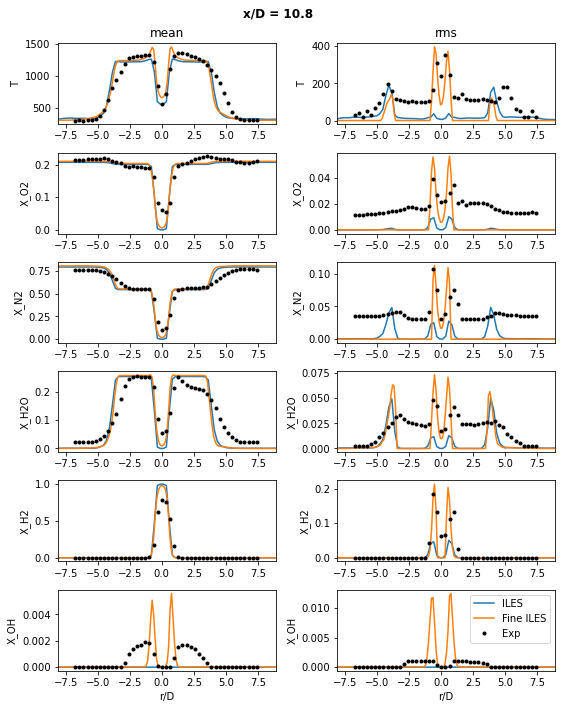

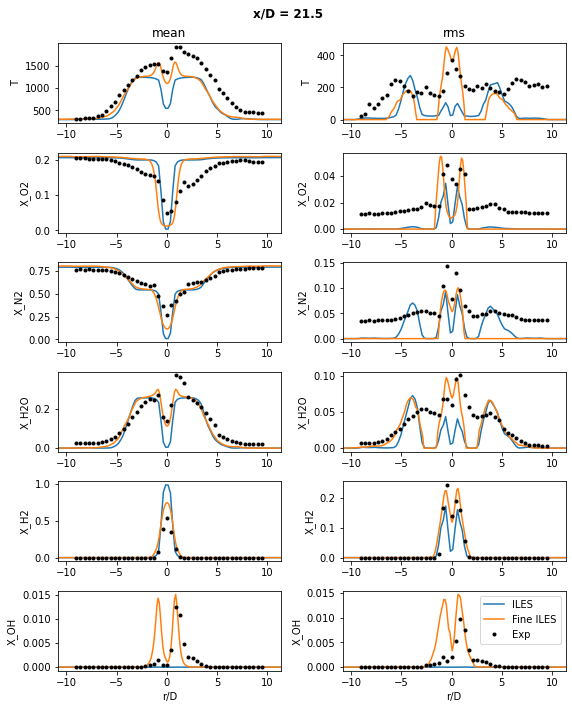

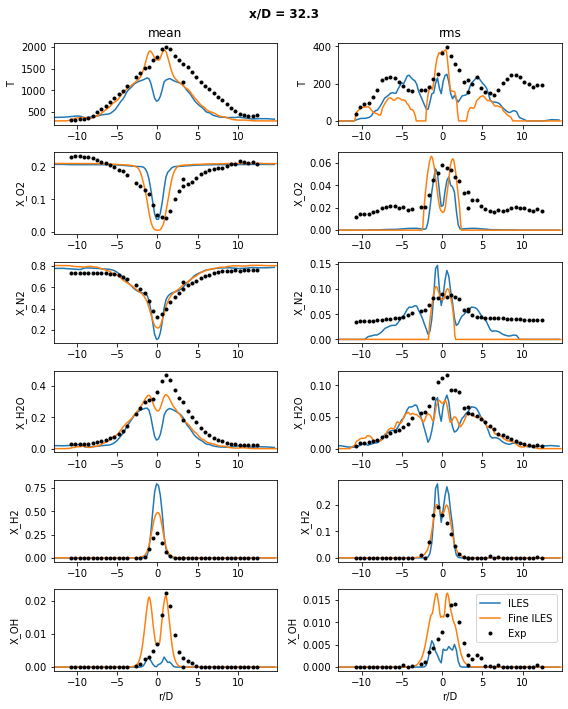

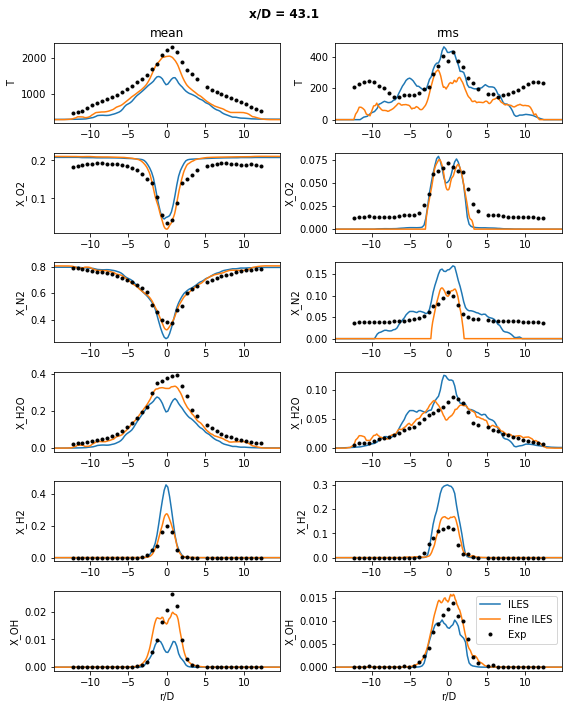

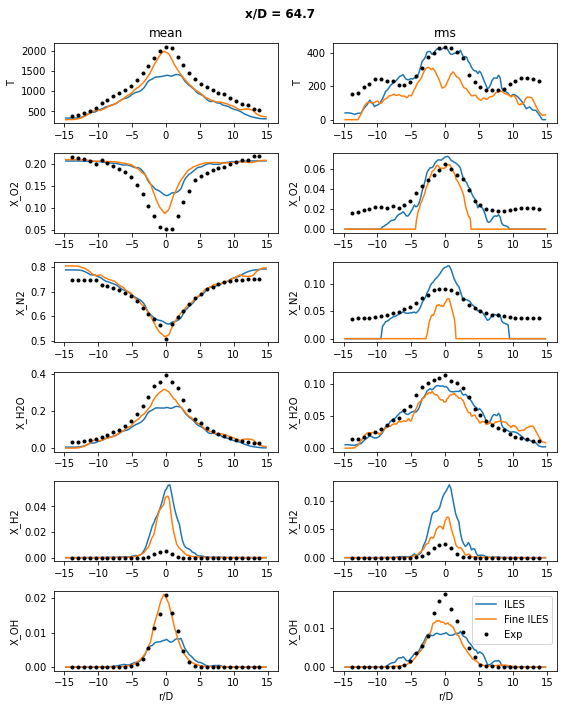

In [5]:
xpos = 10.8 # x/D
produce_figure(xpos)
plt.savefig("iles_"+str(xpos)+".png", facecolor='white')

xpos = 21.5 # x/D
produce_figure(xpos)
plt.savefig("iles_"+str(xpos)+".png", facecolor='white')

xpos = 32.3 # x/D
produce_figure(xpos)
plt.savefig("iles_"+str(xpos)+".png", facecolor='white')

xpos = 43.1 # x/D
produce_figure(xpos)
plt.savefig("iles_"+str(xpos)+".png", facecolor='white')

xpos = 64.7 # x/D
produce_figure(xpos)
plt.savefig("iles_"+str(xpos)+".png", facecolor='white')

## Combined xpos plots

In [55]:
def plot_one_simulation(fstart, fend, xpos, vars, color=None):  
  y, avg, rms = get_stat(fstart, fend, xpos*D, vars)

  for i in range(len(vars)):
    plt.subplot(len(vars), 2, 2*(i+1)-1, projection='3d')
    plt.plot(y/D, xpos*np.ones_like(y), avg[i], color=color)
    
    plt.subplot(len(vars), 2, 2*(i+1), projection='3d')
    plt.plot(y/D, xpos*np.ones_like(y), rms[i], color=color)

def produce_figure(xposs, vars):
  plt.figure(figsize=(8,20))

  for xpos in xposs:
    plot_one_simulation("~/plt03000", "~/plt06000", xpos, vars, color='C0') # Coarse ILES
    plot_one_simulation("~/plt01900", "~/plt04600", xpos, vars, color='C1') # Fine ILES

    # https://core.ac.uk/download/pdf/42814464.pdf
    ref = np.loadtxt("ref_data/x_over_D_"+str(xpos)+".csv", delimiter=',', skiprows=1)

    for i in range(len(vars)):
      plt.subplot(len(vars), 2, 2*(i+1)-1, projection='3d')
      plt.plot(ref[:,0], xpos*np.ones_like(ref[:,0]), ref[:,2*(i+1)-1], 'k.')
      plt.xlim([ref[0,0]*1.2, ref[-1,0]*1.2])
      
      plt.subplot(len(vars), 2, 2*(i+1), projection='3d')
      plt.plot(ref[:,0], xpos*np.ones_like(ref[:,0]), ref[:,2*(i+1)], 'k.')
      plt.xlim([ref[0,0]*1.2, ref[-1,0]*1.2])
      
  for i in range(len(vars)):
    plt.subplot(len(vars), 2, 2*(i+1)-1)
    plt.title("mean "+vars[i])
    plt.xlabel("r/D")
    plt.ylabel("x/D")

    plt.subplot(len(vars), 2, 2*(i+1))
    plt.title("rms "+vars[i])
    plt.xlabel("r/D")
    plt.ylabel("x/D")
    
    if i == len(vars)-1:
      plt.legend(["ILES", "Fine ILES", "Exp"])

  plt.tight_layout()

yt : [INFO     ] 2023-08-04 11:19:27,127 Parameters: current_time              = 0.000493200952968439
yt : [INFO     ] 2023-08-04 11:19:27,128 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO     ] 2023-08-04 11:19:27,130 Parameters: domain_left_edge          = [ 0.   -3.54 -3.54]
yt : [INFO     ] 2023-08-04 11:19:27,131 Parameters: domain_right_edge         = [17.7   3.54  3.54]
yt : [INFO     ] 2023-08-04 11:19:27,252 Parameters: current_time              = 0.000996673771769189
yt : [INFO     ] 2023-08-04 11:19:27,253 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO     ] 2023-08-04 11:19:27,254 Parameters: domain_left_edge          = [ 0.   -3.54 -3.54]
yt : [INFO     ] 2023-08-04 11:19:27,256 Parameters: domain_right_edge         = [17.7   3.54  3.54]
yt : [INFO     ] 2023-08-04 11:19:28,440 Parameters: current_time              = 0.000311906335633637
yt : [INFO     ] 2023-08-04 11:19:28,441 Parameters: domain_dimensions         = [80 32 32]
yt : [INFO    

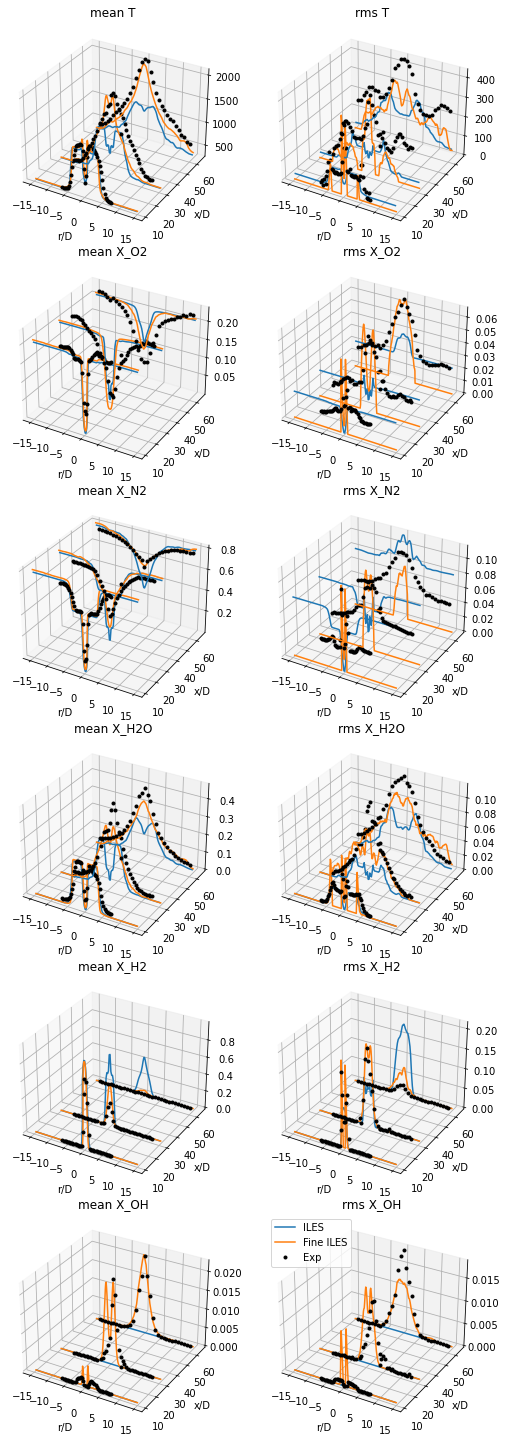

In [56]:
xpos = [10.8, 32.3, 64.7] # x/D 21.5, 43.1, 
vars = ['T', 'X_O2', 'X_N2', 'X_H2O', 'X_H2', 'X_OH'] # variables to plot
produce_figure(xpos, vars)